In [1]:
import tensorflow as tf


In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

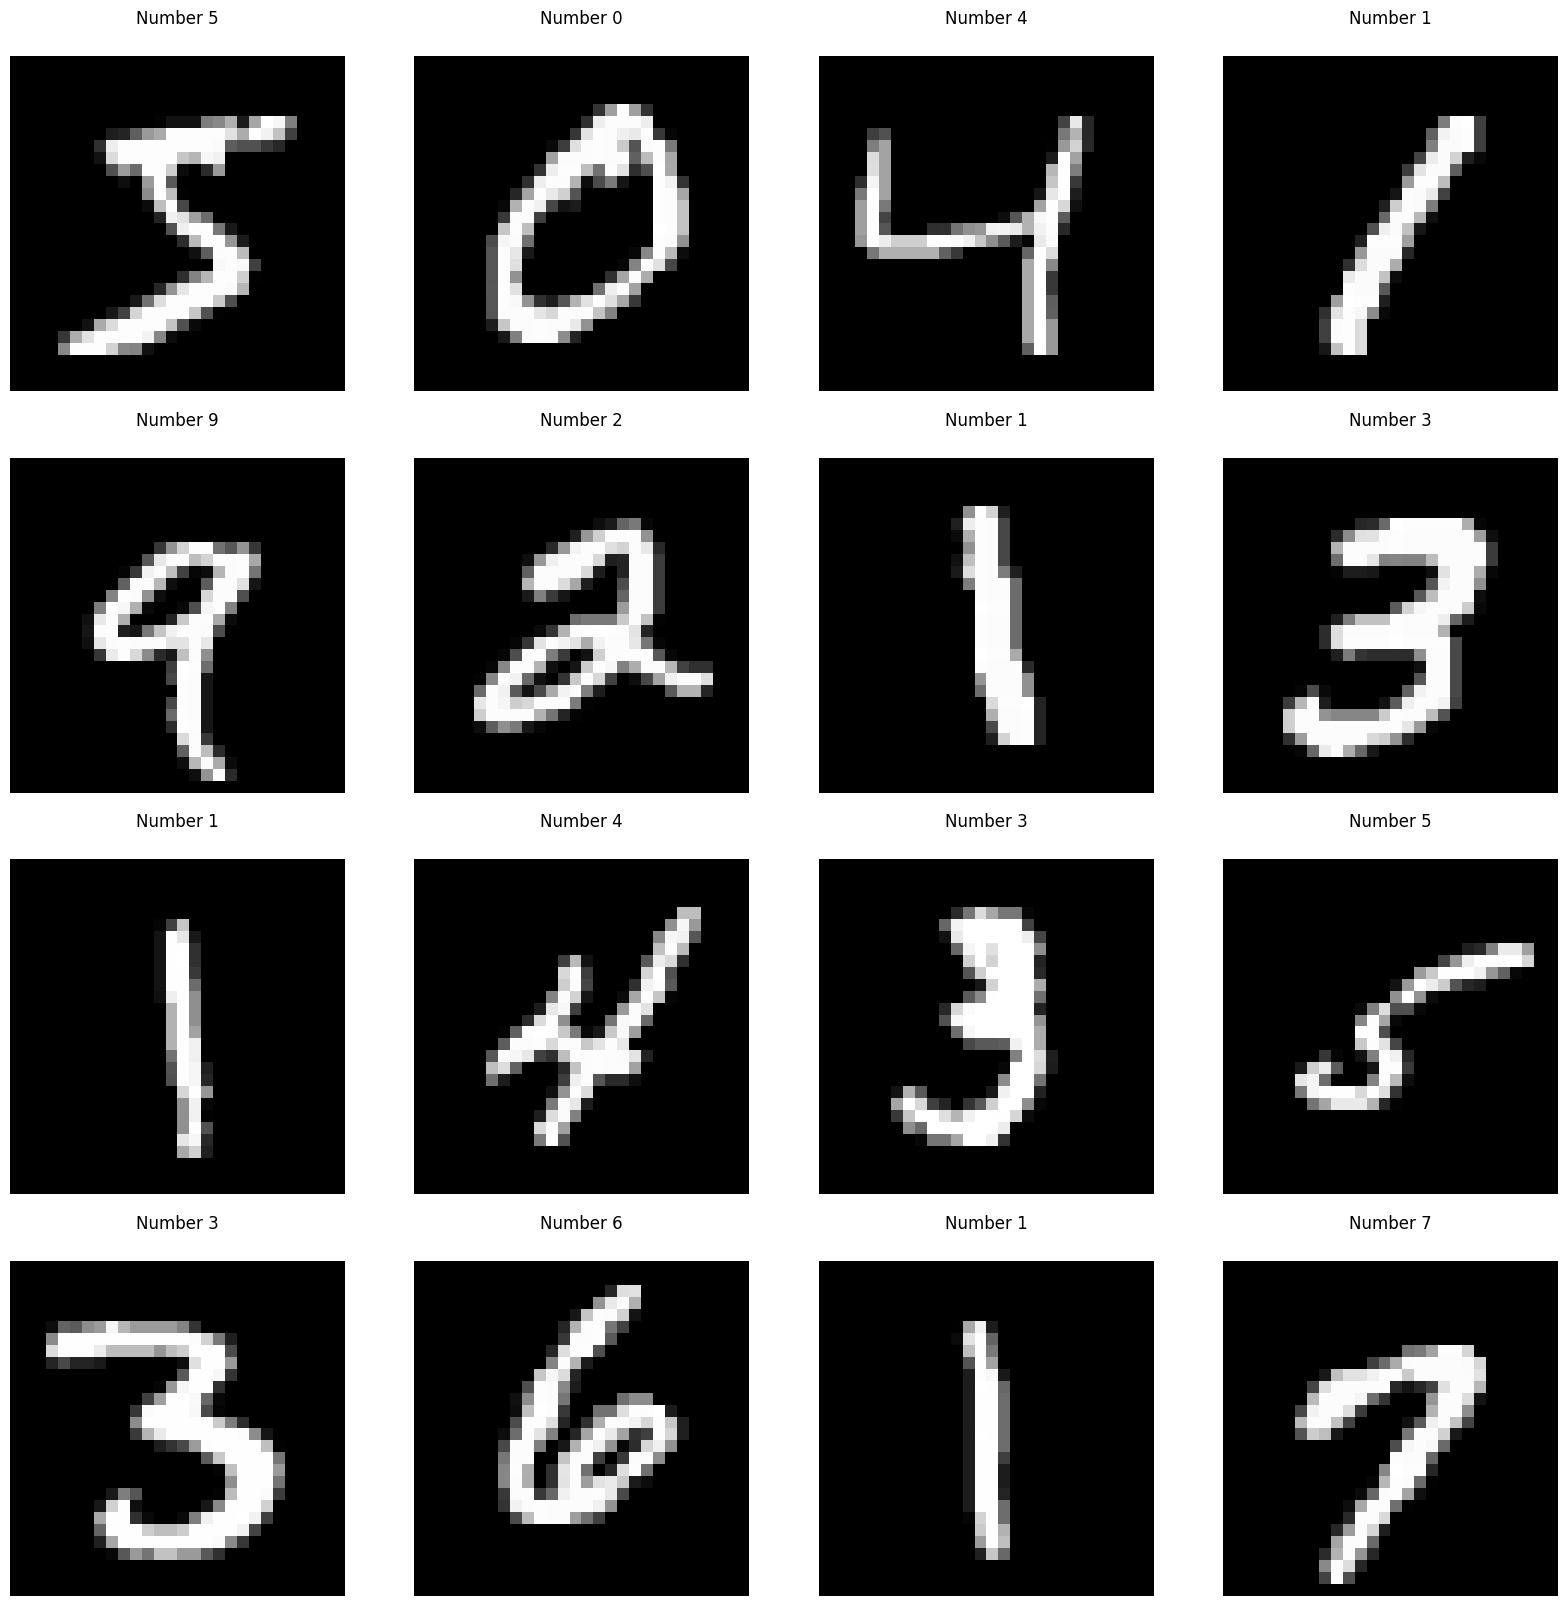

In [7]:
fig,axes = plt.subplots(4,4, figsize= (20,20))
plt.gray()
for i,ax in enumerate(axes.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))
  fig.show()


In [8]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train_shape: ',x_train.shape)
print('No of image in x train', x_train.shape[0])
print('No of image i x test', x_test.shape[0])

x_train_shape:  (60000, 28, 28, 1)
No of image in x train 60000
No of image i x test 10000


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten ,MaxPooling2D,Dropout

In [17]:
model= Sequential()
model.add(Conv2D(28, kernel_size= (3,3),input_shape=input_shape))

#model.add(Convolution2D(6,3,3,input_shape=(256,768,1),activation='relu'))


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [18]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x=x_train, y=y_train,epochs=1)

1875/1875 [==============================] - 44s 23ms/step - loss: 0.2148 - accuracy: 0.9357


In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0878 - accuracy: 0.9715


[0.08780395239591599, 0.9714999794960022]